In [45]:
import pandas as pd
import matplotlib as plt

%matplotlib inline

In [46]:
cmap = plt.cm.get_cmap('plasma')
titanic_data_raw = pd.read_csv('titanic_data.csv', index_col='PassengerId')

## First we Take a look at the data to get a sense of what the data looks like

In [47]:
titanic_data_raw.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


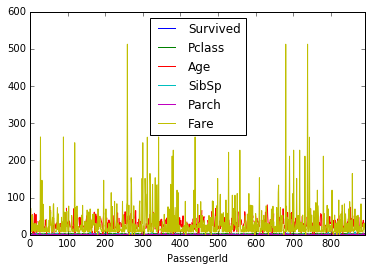

In [48]:
titanic_data_raw.plot()

The plot isn't very helpful in describing the data. and is very cluttered. so perhabs we should try the ```describe() ```
function

In [49]:
titanic_data_raw.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



#### Since we'll be needing to do a lot of plotting of the data based on groups. The following function will come in handy

In [50]:
def survival_percentage(based_on, data=titanic_data_raw, plot_type='bar'):
    survival = data.groupby(based_on)['Survived']
    survival_percentage = (survival.sum()/survival.count()).reset_index()
    survival_percentage.set_index(based_on,inplace=True)
    survival_percentage.plot(kind = plot_type, subplots=True, cmap=cmap, stacked= True)
    return survival

The function simply groups the data by a column or set of columns and then calculats the survival percentage of every group. then returns the groupby object and plots the survival percentage 
#### next
we examine the relationship between survivability (percentage of passengers who survived) and each column's groups
##### However, some columns are much more interesting to examine. like the Pclass or the embarked columns

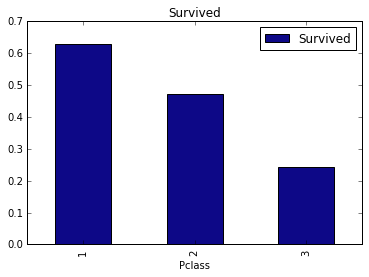

In [51]:
survival_percentage( based_on='Pclass')

The plot indicates that a higher class (1st, 2nd then 3rd) is associated with higher survivability. however we'd need to conduct a t-test to determine whether that's true.

In [75]:
from scipy.stats import ttest_1samp
population_mean = titanic_data_raw['Survived'].mean()

def t_test(column, group, data = titanic_data_raw):
    sample = data[data[column]==group].sample(frac=.4)['Survived'].values
    t, p = ttest_1samp(sample, population_mean)
    print 't-value: {}'.format(t)
    print 'p-value: {}'.format(p)
    if p <0.001:
        print'The P value of {} is statistically significant at an alpha level of 0.001'.format(p)
    elif p <0.01:
        print'The P value of {} is statistically significant at an alpha level of 0.01'.format(p)
    elif p <0.05:
        print'The P value of {} is statistically significant at an alpha level of 0.05'.format(p)
    else:
        print'The P value of {} is not considered statistically significant'.format(p)
    return t,p

Now we Run a t-test on Pclass = 1 to decide if the difference of survival rates for people in 1st class is significantly higher

In [76]:
t_test('Pclass',1)

t-value: 3.92571780313
p-value: 0.00017509860154
The P value of 0.00017509860154 is statistically significant at an alpha level of 0.001


(3.9257178031343689, 0.000175098601540322)

The t-value is positive, and the p-value is very significant. which means that passengers on 1st class had a significantly higher rate of survival


In [77]:
t_test('Pclass',2)

t-value: 1.06755125103
p-value: 0.289240731125
The P value of 0.289240731125 is not considered statistically significant


(1.0675512510347254, 0.28924073112522197)

The P-value is not significant.

In [78]:
t_test('Pclass',3)

t-value: -4.71109498033
p-value: 4.67420553243e-06
The P value of 4.67420553243e-06 is statistically significant at an alpha level of 0.001


(-4.7110949803274078, 4.6742055324288445e-06)

The t-value is negative, and the p-value is very significant. which means that passengers on 3rd class had a significantly lower rate of survival


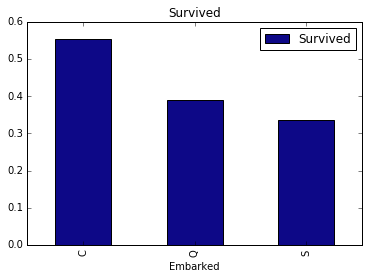

In [79]:
survival_percentage(based_on='Embarked')

In [80]:
t_test('Embarked','C')

t-value: 2.00888093464
p-value: 0.0486433641404
The P value of 0.0486433641404 is statistically significant at an alpha level of 0.05


(2.0088809346443748, 0.048643364140432251)

In [81]:
t_test('Embarked','Q')

t-value: -0.331974021126
p-value: 0.742217160071
The P value of 0.742217160071 is not considered statistically significant


(-0.33197402112607877, 0.74221716007117733)

In [82]:
t_test('Embarked','S')

t-value: -0.78040896873
p-value: 0.435868373921
The P value of 0.435868373921 is not considered statistically significant


(-0.78040896872977084, 0.43586837392112776)

In [84]:
def conduct_test(column, data = titanic_data_raw):
    survival_percentage(based_on=column)
    for cat in set(data[column].values):
        print 'T-test for {} = {} :- '.format(column, cat)
        t_test(column,cat)
        print ''

T-test for Parch = 0 :- 
t-value: -1.80499337178
p-value: 0.0721897225912
The P value of 0.0721897225912 is not considered statistically significant

T-test for Parch = 1 :- 
t-value: 3.94665841252
p-value: 0.000269166348053
The P value of 0.000269166348053 is statistically significant at an alpha level of 0.001

T-test for Parch = 2 :- 
t-value: 0.254071250082
p-value: 0.80111821821
The P value of 0.80111821821 is not considered statistically significant

T-test for Parch = 3 :- 
t-value: inf
p-value: 0.0
The P value of 0.0 is statistically significant at an alpha level of 0.001

T-test for Parch = 4 :- 
t-value: -inf
p-value: 0.0
The P value of 0.0 is statistically significant at an alpha level of 0.001

T-test for Parch = 5 :- 
t-value: -inf
p-value: 0.0
The P value of 0.0 is statistically significant at an alpha level of 0.001

T-test for Parch = 6 :- 
t-value: nan
p-value: nan
The P value of nan is not considered statistically significant



C:\Users\ayman\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\ayman\Anaconda2\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


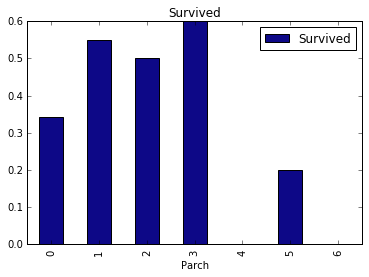

In [85]:
conduct_test('Parch')

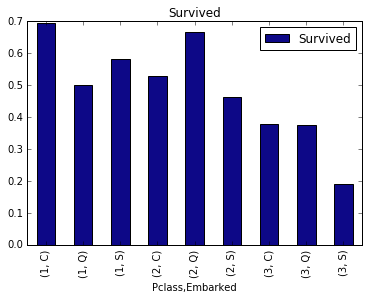

In [87]:
survival_percentage(based_on=['Pclass','Embarked'])

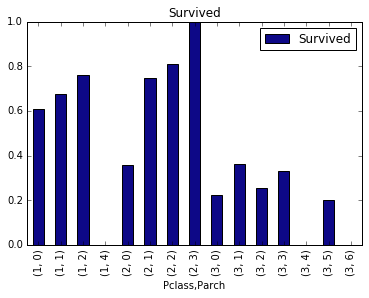

In [16]:
survival_by_PP = survival_percentage(based_on=['Pclass','Parch'])

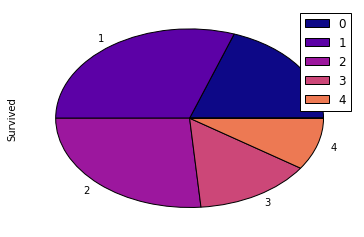

In [17]:
survival_percentage( based_on=['SibSp'],plot_type = 'pie')

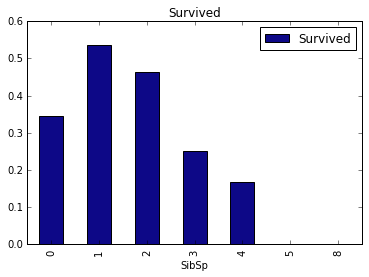

In [18]:
survival_percentage( based_on=['SibSp'],plot_type = 'bar')

In [19]:
survival_percentage_by_Parch.plot.bar()

NameError: name 'survival_percentage_by_Parch' is not defined